In [37]:
%matplotlib inline
from matplotlib import pyplot as plt
import mglearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(\
fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
x.shape: (26, 2)


C:\ProgramData\Anaconda3\envs\leejaewon\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


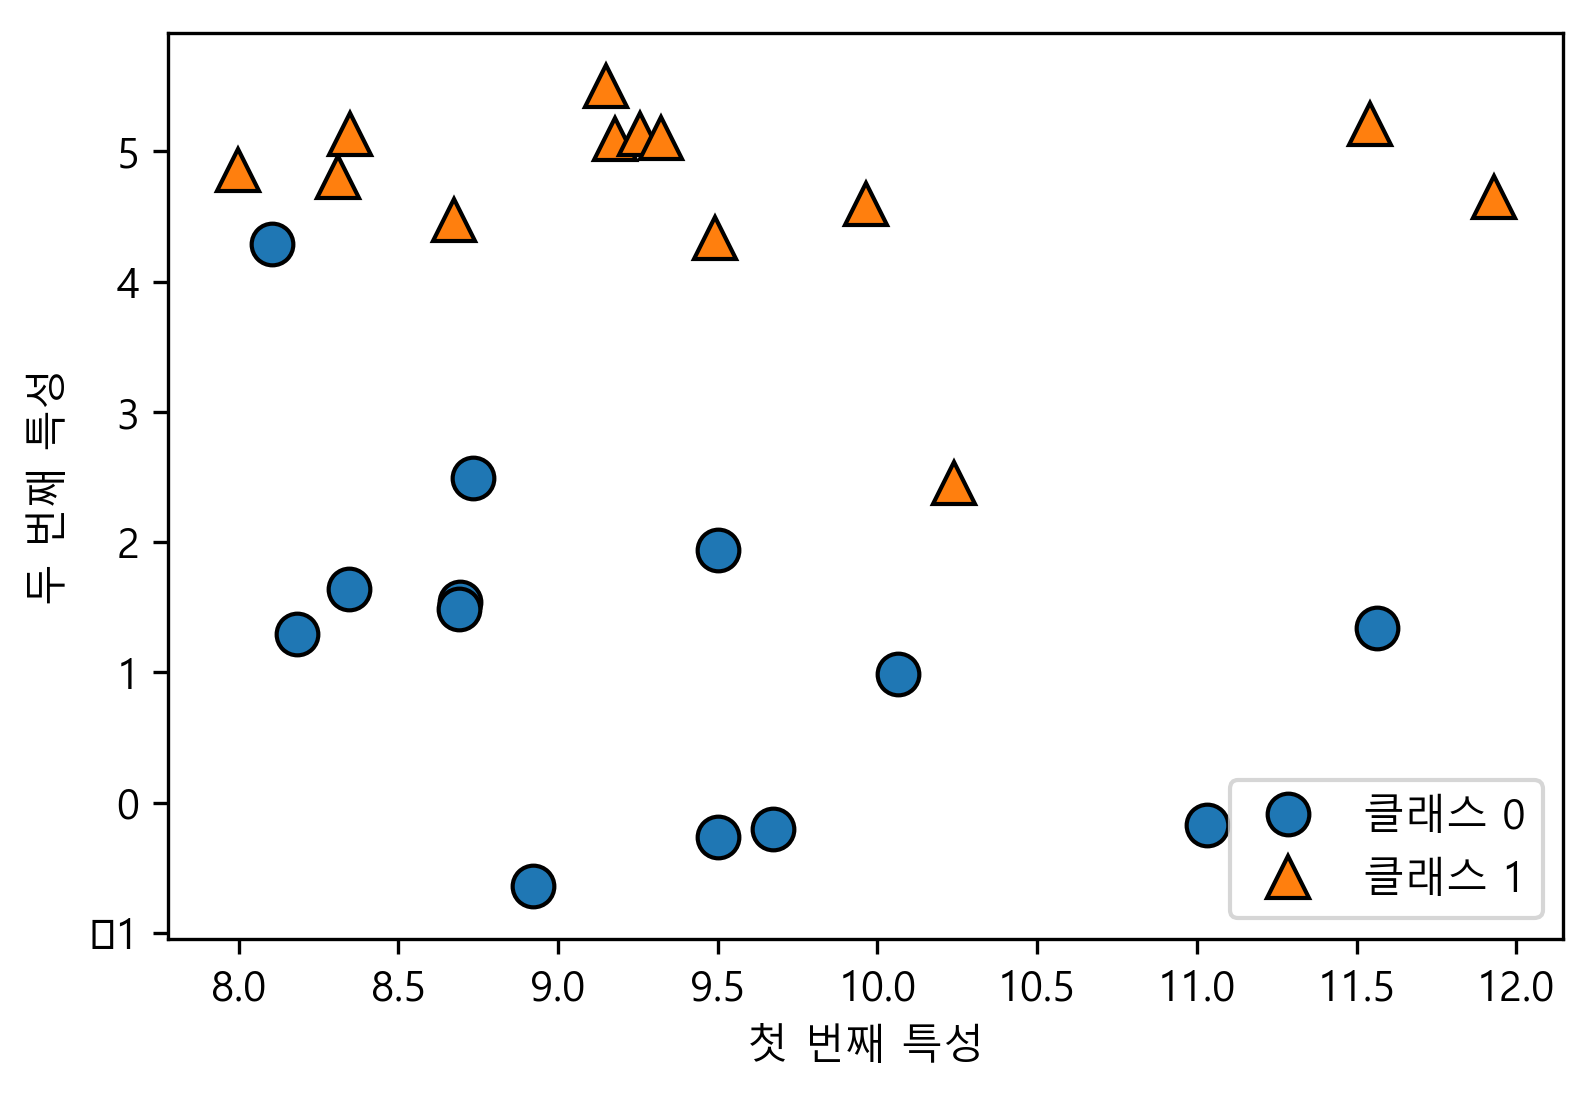

In [24]:
# 그래프 해상도 설정
plt.rcParams['figure.dpi'] = 300
# forge Datasets 생성
# x가 data, y가 label
x, y = mglearn.datasets.make_forge()
print(x)
print(y)
# 산점도
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
# 범례 설정
plt.legend(["클래스 0", "클래스 1"], loc = 4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")

# 데이터포인트 26개와 특성 2개
print("x.shape: {}".format(x.shape))

C:\ProgramData\Anaconda3\envs\leejaewon\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


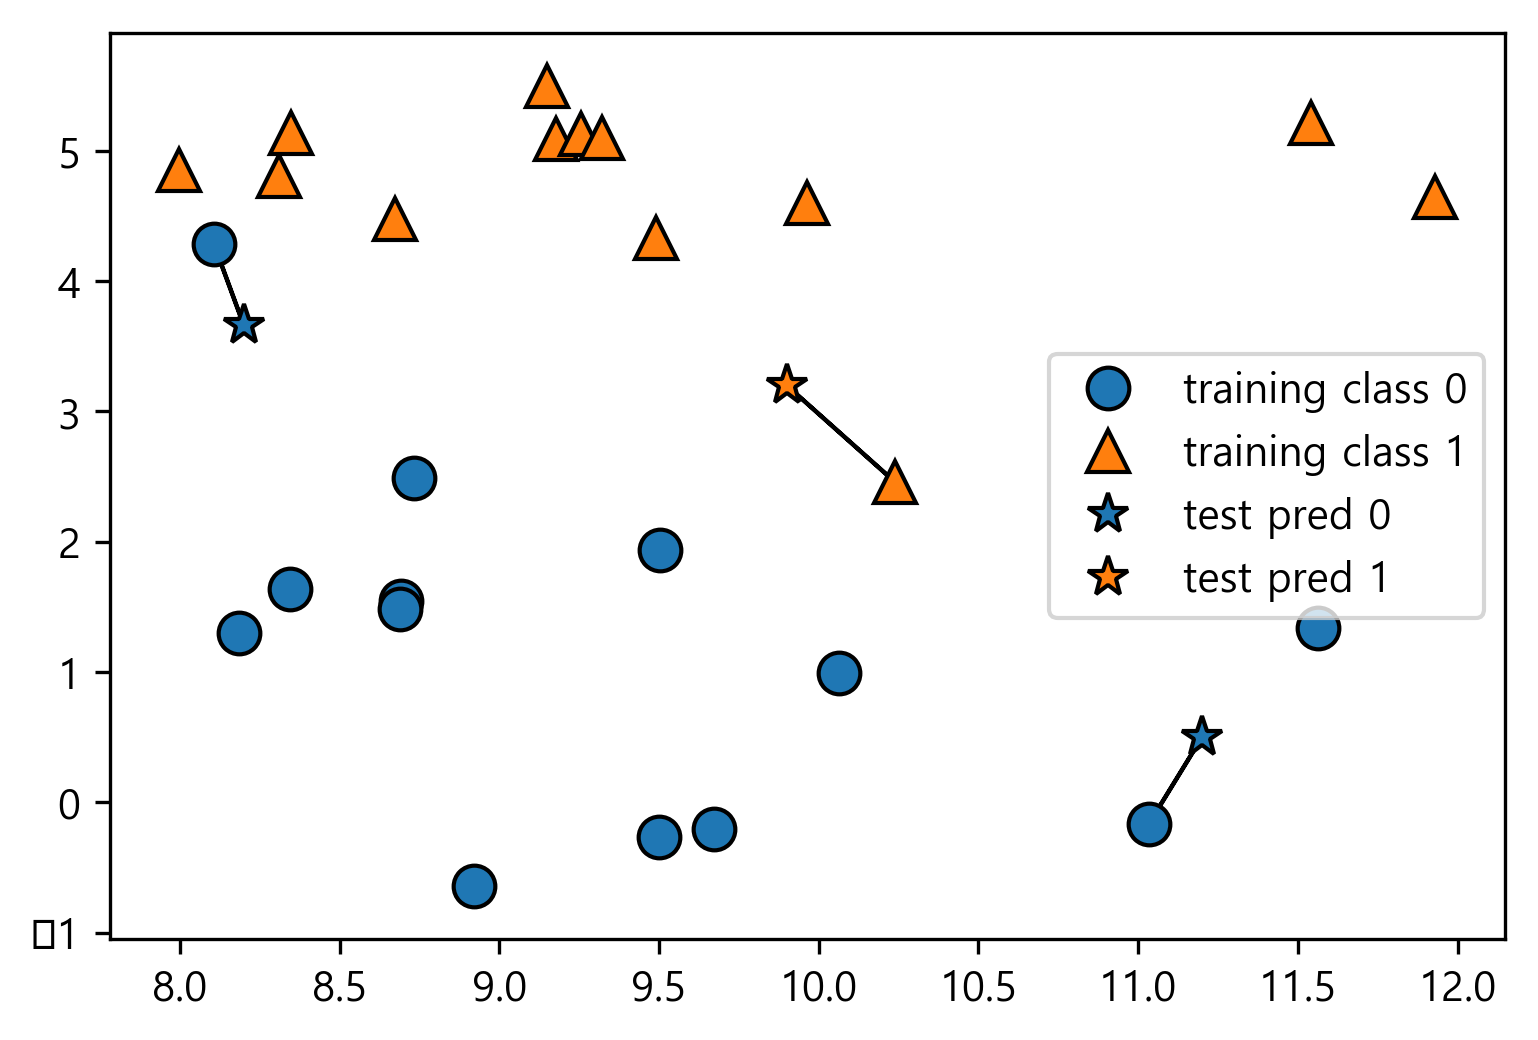

In [30]:
# 최근접 이웃(가장 가까운)의 수가 1일 때
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\ProgramData\Anaconda3\envs\leejaewon\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


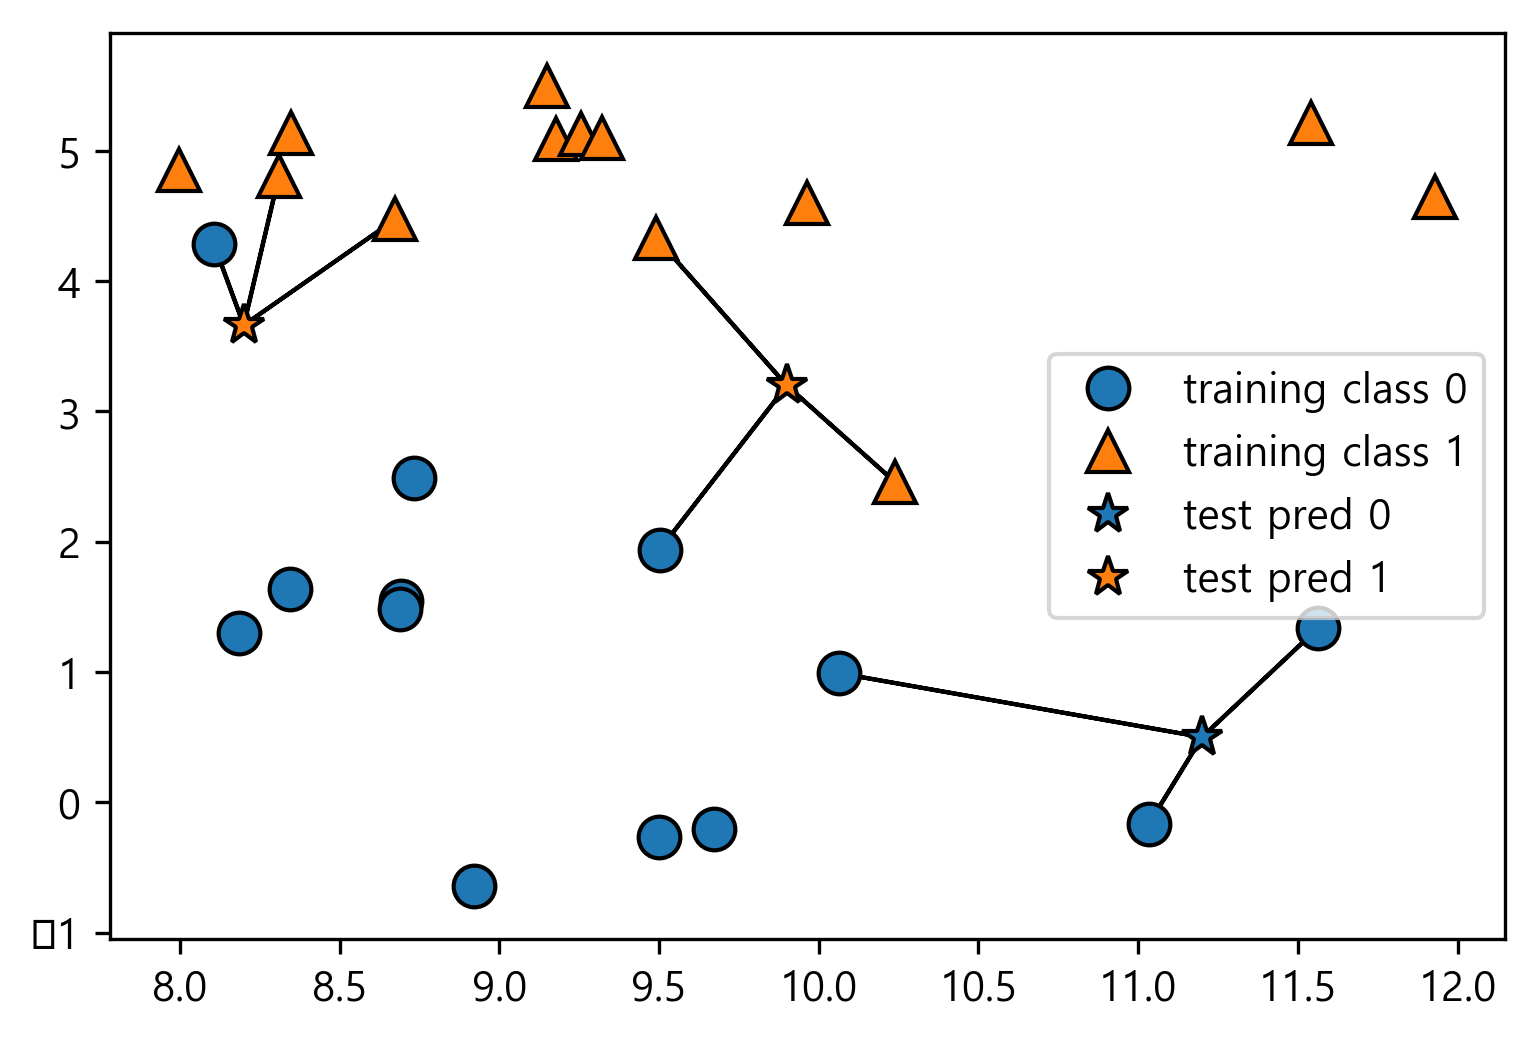

In [26]:
# 최근접 이웃(가장 가까운)의 수가 3일 때
# 다수결의 원칙에 따라서 결정된다.
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [64]:
# Datasets 생성 및 분리
x, y = mglearn.datasets.make_forge()
#print(x)
#print(y)
#print(len(x), len(y))
# Data와 Label을 8:2(0.2) 비율로 Train_set, Test_set으로 나눈다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

C:\ProgramData\Anaconda3\envs\leejaewon\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [12]:
# 3개의 이웃
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [15]:
# 데이터 학습(Training)
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [16]:
# 데이터 테스트(Test)
predY = clf.predict(x_test)
# 실제값(y_test)와 Knn모델 적용 예측값 비교(predY -> x_test)
# Data를 train과 test로 8:2 나눴기 때문에 test 값이 6개 나옵니다.
print("검증용 데이터 값 : {}".format(y_test))
print("검증용 데이터 예측: {}".format(predY))

검증용 데이터 값 : [1 0 1 0 1 1]
검증용 데이터 예측: [1 0 1 0 1 0]


In [17]:
print("검증용 데이터셋 정확도 : {:.2f}".format(clf.score(x_test, y_test)))

검증용 데이터셋 정확도 : 0.83


In [19]:
import sklearn.metrics as sm
sm.confusion_matrix(y_test, predY)

array([[2, 0],
       [1, 3]], dtype=int64)

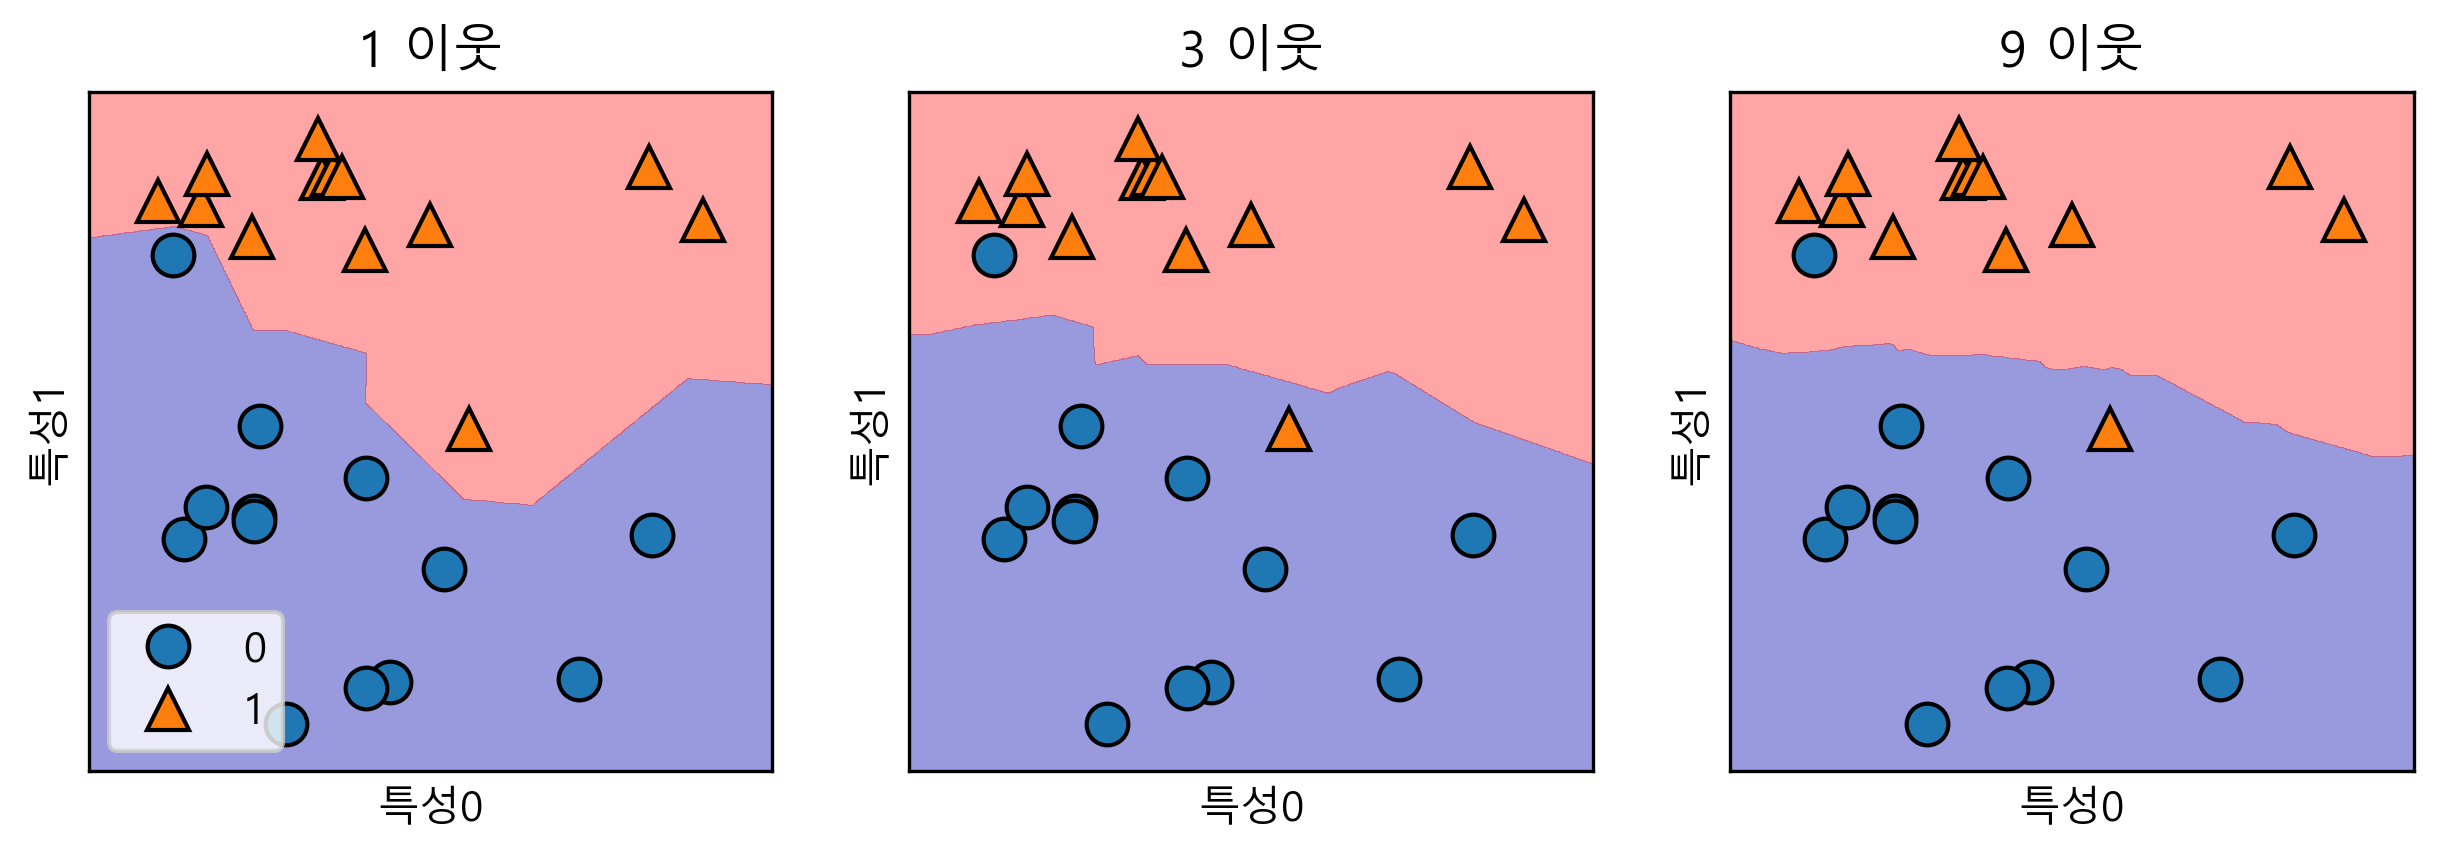

In [22]:
# 1행 3열의 서브플롯
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n, ax in zip([1, 3, 9], axes) :
    clf = KNeighborsClassifier(n_neighbors = n).fit(x, y)
    mglearn.plots.plot_2d_separator(clf, x, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(x[:, 0], x[:, 1], y, ax=ax)
    ax.set_title("{0} 이웃".format(n))
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")
    
axes[0].legend(loc=3)

# k=1 : 훈련 데이터에 가깝게 따라감
# 이웃의 수를 늘릴수록 경계는 더 부드러워짐
# 이웃을 적게 사용하면 모델의 복잡도가 높아지고, 많이 사용하면 복잡도는 낮아진다.

In [33]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys() : {}".format(cancer.keys()))

cancer.keys() : dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [34]:
# 569개의 데이터, 특성 30개
print("데이터의 형태: {}".format(cancer.data.shape))

데이터의 형태: (569, 30)


In [38]:
# 악성 212개, 양성 357개
print("클래스별 샘플 갯수: \n{}".format(
        {n: v for n, v in zip(cancer.target_names,
                              np.bincount(cancer.target))}))

클래스별 샘플 갯수: 
{'malignant': 212, 'benign': 357}


In [39]:
print("특성 이름: \n{}".format(cancer.feature_names))

특성 이름: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


[1.0, 0.9765258215962441, 0.9577464788732394, 0.9553990610328639, 0.9483568075117371, 0.9460093896713615, 0.9436619718309859, 0.9413145539906104, 0.9342723004694836, 0.9389671361502347]
[0.9020979020979021, 0.8881118881118881, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9370629370629371, 0.9300699300699301, 0.9300699300699301, 0.916083916083916, 0.916083916083916]


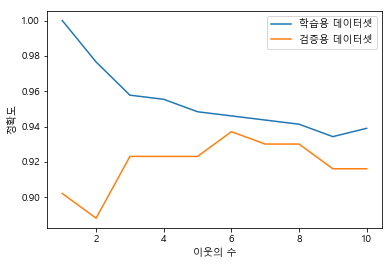

In [40]:
# 학습용 : 검증용 = 75 : 25
x_train, x_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target,
    random_state=66)
# 모델의 정확도를 저장하기 위한 리스트
train_rate = []
test_rate = []
# k의 값에 따라 결과가 달라지므로 어떤 값이 최적인지 찾아내는 것이 필요함
# 1에서 10까지 n_neighbors 를 적용
neighbors = range(1, 11)
for n in neighbors :
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n)
    # 모델 학습
    clf.fit(x_train, y_train)
    # 학습용 데이터셋의 정확도
    train_rate.append(clf.score(x_train, y_train))
    # 검증용 데이터셋의 정확도
    test_rate.append(clf.score(x_test, y_test))
    
print(train_rate)
print(test_rate)
plt.plot(neighbors, train_rate, label="학습용 데이터셋")
plt.plot(neighbors, test_rate, label="검증용 데이터셋")
plt.xlabel("이웃의 수")
plt.ylabel("정확도")
plt.legend()
# 학습용 데이터셋의 경우 이웃이 1개일 때 100% 예측(과적합)
# 이웃의 수가 늘어나면 학습용 데이터셋의 경우 모델이 단순해지고 정확도는 줄어든다.
# 6개를 사용했을 때 테스트 정확도가 가장 높다.

 

In [42]:
from sklearn.datasets import load_iris
# 데이터 로딩
iris_dataset = load_iris()
# print(iris_dataset)

In [43]:
print("iris_dataset의 keys: {}".format(iris_dataset.keys()))

iris_dataset의 keys: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [65]:
# 데이터셋에 대한 설명
# print(iris_dataset['DESCR'])

In [45]:
#우리가 예측하려는 붓꽃 품종의 이름
print("타깃의 이름: {}".format(iris_dataset['target_names']))

타깃의 이름: ['setosa' 'versicolor' 'virginica']


In [46]:
print("특성의이름: {}".format(iris_dataset['feature_names']))

특성의이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [47]:
print("data의 타입: {}".format(type(iris_dataset['data'])))

data의 타입: <class 'numpy.ndarray'>


In [48]:
# 데이터의 크기 : 150행 4열
print("data의 크기: {}".format(iris_dataset['data'].shape))

data의 크기: (150, 4)


In [49]:
print("data의 처음 다섯 행: \n{}".format(iris_dataset['data'][:5]))

data의 처음 다섯 행: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [50]:
print("target의 타입: {}".format(type(iris_dataset['target'])))

target의 타입: <class 'numpy.ndarray'>


In [51]:
# target 150개
print("target의 크기: {}".format(iris_dataset['target'].shape))

target의 크기: (150,)


In [52]:
print("target: \n{}".format(iris_dataset['target']))

target: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [67]:
# train_test_split() : 전체 데이터 중 75%를
# 학습용 데이터셋(x_train)으로 선택, 25%를 검증용 데이터셋(x_test)으로 선택
# random_state = 0 유사 난수 생성기로 데이터셋을 무작위로 추출하게 됨
# 0은 난수 초기값, 난수 초기값을 고정시키면 항상 같은 결과가 나오게 함
x_train, x_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state = 0)

In [68]:
print("x_train 크기: {}".format(x_train.shape))
print("y_train 크기: {}".format(y_train.shape))

x_train 크기: (112, 4)
y_train 크기: (112,)


In [69]:
print("x_test 크기: {}".format(x_test.shape))
print("y_test 크기: {}".format(y_test.shape))

x_test 크기: (38, 4)
y_test 크기: (38,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000276026C7828>,
      dtype=object)

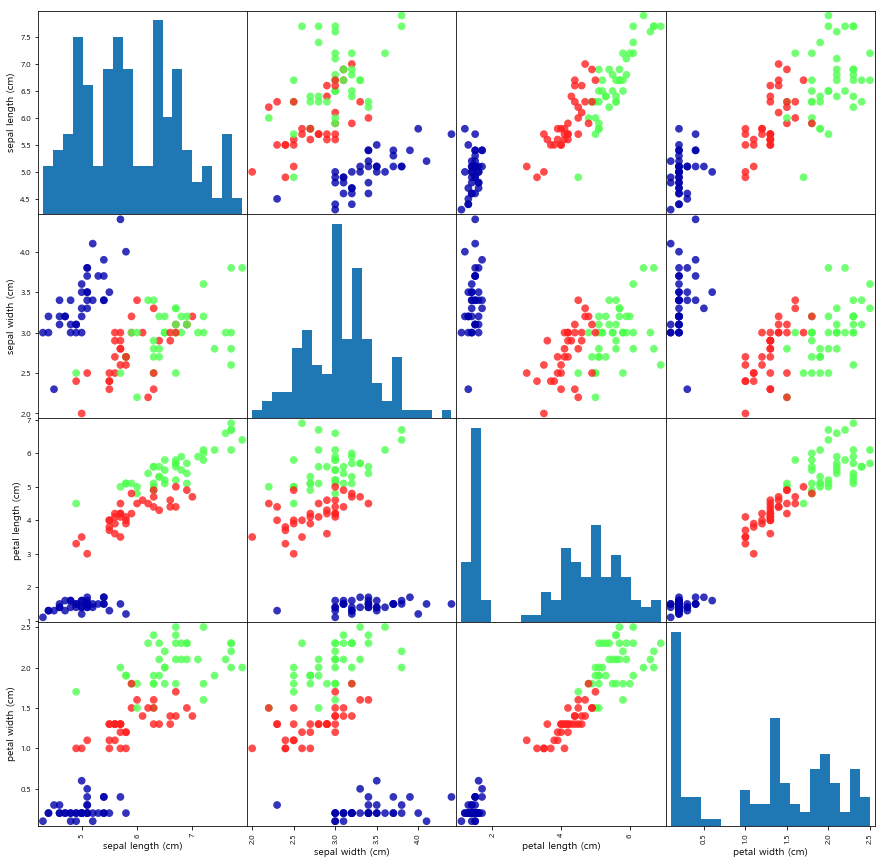

In [72]:
# 산점도 : 데이터를 x, y 축에 놓아 각 데이터 포인트를 하나의 점으로 나타내는 그래프
iris_dataframe = pd.DataFrame(x_train,
                             columns = iris_dataset.feature_names)
# 데이터프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬 출력
pd.plotting.scatter_matrix(iris_dataframe, c = y_train,
                           figsize=(15, 15),
                           marker='o', hist_kwds={'bins' : 20}, s=60, alpha=0.8,
                            cmap = mglearn.cm3)
# 그래프를 보면 세 클래스가 비교적 잘 구분되고 있으므로 머신러닝하기에 적합한 데이터임

In [58]:
# knn 알고르짐
# 새로운 데이터 포인트에 가장 가까운 k개의 이웃을 찾는다.
# 1개의 이웃만을 찾는다.
knn = KNeighborsClassifier(n_neighbors=1)

In [59]:
# 학습용 데이터셋으로부터 모델 생성
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [3]:
# 예측하기
# 꽃받침의 길이가 5cm, 폭 2.9cm, 꽃잎 길이 1cm, 폭 0.2cm인 붓꽃의 품종은?
x_new = np.array([[5, 2.9, 1, 0.2]])
print("입력 데이터: {}".format(x_new.shape))
prediction = knn.predict(x_new)
print("예측결과: {}".format(prediction))
print("예측한 타깃의 이름: {}".format(
        iris_dataset['target_names'][prediction]))

NameError: name 'np' is not defined

In [74]:
# 모델평가
y_pred = knn.predict(x_test)
print("검증용 데이터셋의 실제값: \n{}".format(y_test))
print("검증용 데이터셋에 대한 예측값: \n{}".format(y_pred))

검증용 데이터셋의 실제값: 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
검증용 데이터셋에 대한 예측값: 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [63]:
# 정확도를 출력하는 방법(2가지 방법)
print("검증용 데이터셋의 정확도: {:.2f}".format(\
                                    np.mean(y_pred == y_test)))
print("검증용 데이터셋의 정확도: {:.2f}".format(\
                                    knn.score(x_test, y_test)))

검증용 데이터셋의 정확도: 0.97
검증용 데이터셋의 정확도: 0.97


NameError: name 'iris_dataset' is not defined